<a href="https://colab.research.google.com/github/navyavemavarapu/EDA/blob/main/Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/train 2.csv")

In [ ]:
df1.shape 

(913000, 4)

In [ ]:
df = df1.copy()

In [ ]:
df.shape

(913000, 4)

In [ ]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

# DATE

In [ ]:
df.date.values[0]

'2013-01-01'

In [ ]:
df.date.isnull().sum() # No null values

0

In [ ]:
df.date = pd.to_datetime(df.date,format='%Y-%m-%d')

In [ ]:
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
#df['weekday'] = df['date'].dt.day_name()

In [ ]:
df.head()

,date,store,item,sales,Year,Month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1


In [ ]:
df.Year.value_counts()

2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: Year, dtype: int64

In [ ]:
df['date'].agg(['min','max'])

min    2013-01-01
max    2017-12-31
Name: date, dtype: object

# Items and stores

In [ ]:
df['item'].values[0] # data is in right format

1

In [ ]:
len(df['item'].value_counts())

50

In [ ]:
df['store'].isnull().sum()

0

In [ ]:
df['store'].values[0] # data is in right format

1

In [ ]:
len(df['store'].value_counts())

10

In [ ]:
df['store'].isnull().sum()

0

In [ ]:
df['store'].value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [ ]:
df['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

All the 10 stores sold each and every time (all 50 items) on every day. 

In [ ]:
df.columns

Index(['date', 'store', 'item', 'sales', 'Year', 'Month'], dtype='object')

# Agggregation

# 2013

In [ ]:
yr13 = df[df.Year==2013].groupby(['Year','Month','item'])['sales'].sum()
yr13

Year  Month  item
2013  1      1        3794
             2       10379
             3        6345
             4        3718
             5        3103
                     ...  
      12     46      11340
             47       4330
             48       9882
             49       5612
             50      12849
Name: sales, Length: 600, dtype: int64

In [ ]:
year13 = yr13.to_frame(name="Total_sales").reset_index()
year13.head()

,Year,Month,item,Total_sales
0,2013,1,1,3794
1,2013,1,2,10379
2,2013,1,3,6345
3,2013,1,4,3718
4,2013,1,5,3103


In [ ]:
year13.Total_sales.sum()

7941243

**Quarter-1, 2013**

In [ ]:
quart_1= year13[year13['Month'] <= 3]

In [ ]:
quart_1

,Year,Month,item,Total_sales
0,2013,1,1,3794
1,2013,1,2,10379
2,2013,1,3,6345
3,2013,1,4,3718
4,2013,1,5,3103
...,...,...,...,...
145,2013,3,46,13949
146,2013,3,47,5282
147,2013,3,48,12189
148,2013,3,49,6946


In [ ]:
quart1 = quart_1.groupby(['Year','item'])['Total_sales'].sum()

In [ ]:
quart1.head()

Year  item
2013  1       12847
      2       34650
      3       21420
      4       12884
      5       10630
Name: Total_sales, dtype: int64

In [ ]:
quart1_13 = quart1.to_frame(name="sales").reset_index()

In [ ]:
quart1_13['Quarter'] = 1

In [ ]:
quart1_13.head()

,Year,item,sales,Quarter
0,2013,1,12847,1
1,2013,2,34650,1
2,2013,3,21420,1
3,2013,4,12884,1
4,2013,5,10630,1


**Quarter-2, 2013**

In [ ]:
quart_2= year13[(year13['Month'] > 3) & (year13['Month'] <= 6 )]

In [ ]:
quart_2['Month'].value_counts()

4    50
5    50
6    50
Name: Month, dtype: int64

In [ ]:
quart2 = quart_2.groupby(['Year','item'])['Total_sales'].sum()

In [ ]:
quart2_13 = quart2.to_frame(name="sales").reset_index()

In [ ]:
quart2_13['Quarter'] = 2

In [ ]:
quart2_13.head(3)

,Year,item,sales,Quarter
0,2013,1,18820,2
1,2013,2,49902,2
2,2013,3,31597,2


**Quarter-3,2013**

In [ ]:
quart_3= year13[(year13['Month'] > 6) & (year13['Month'] <= 9 )]
quart_3['Month'].value_counts()

7    50
8    50
9    50
Name: Month, dtype: int64

In [ ]:
quart3 = quart_3.groupby(['Year','item'])['Total_sales'].sum()
quart3_13 = quart3.to_frame(name="sales").reset_index()
quart3_13['Quarter'] = 3
quart3_13.head(3)

,Year,item,sales,Quarter
0,2013,1,19292,3
1,2013,2,51720,3
2,2013,3,32490,3


**Quarter_4,2013**

In [ ]:
quart_4= year13[year13['Month'] > 9 ]
quart_4['Month'].value_counts()

10    50
11    50
12    50
Name: Month, dtype: int64

In [ ]:
quart4 = quart_4.groupby(['Year','item'])['Total_sales'].sum()
quart4_13 = quart4.to_frame(name="sales").reset_index()
quart4_13['Quarter'] = 4
quart4_13.head(3)

,Year,item,sales,Quarter
0,2013,1,15764,4
1,2013,2,41824,4
2,2013,3,25905,4


In [ ]:
quart1_13['sales'].sum() + quart2_13['sales'].sum() + quart3_13['sales'].sum() + quart4_13['sales'].sum()

7941243

# 2014

In [ ]:
yr14 = df[df.Year==2014].groupby(['Year','Month','item'])['sales'].sum()
yr14

Year  Month  item
2014  1      1        4323
             2       11910
             3        7337
             4        4307
             5        3723
                     ...  
      12     46      12894
             47       4803
             48      11525
             49       6521
             50      14633
Name: sales, Length: 600, dtype: int64

In [ ]:
year14 = yr14.to_frame(name="Total_sales").reset_index()
year14.head()

,Year,Month,item,Total_sales
0,2014,1,1,4323
1,2014,1,2,11910
2,2014,1,3,7337
3,2014,1,4,4307
4,2014,1,5,3723


In [ ]:
year14.Total_sales.sum()

9135482

**Quarter-1,2014**

In [ ]:
quart_1= year14[year14['Month'] <= 3 ]
quart_1['Month'].value_counts()

1    50
2    50
3    50
Name: Month, dtype: int64

In [ ]:
quart1 = quart_1.groupby(['Year','item'])['Total_sales'].sum()
quart1_14 = quart1.to_frame(name="sales").reset_index()
quart1_14['Quarter'] = 1
quart1_14.head(3)

,Year,item,sales,Quarter
0,2014,1,14574,1
1,2014,2,39912,1
2,2014,3,24542,1


**Quarter-2,2014**

In [ ]:
quart_2= year14[(year14['Month'] > 3) & (year14['Month'] <= 6)]
quart_2['Month'].value_counts()

4    50
5    50
6    50
Name: Month, dtype: int64

In [ ]:
quart2 = quart_2.groupby(['Year','item'])['Total_sales'].sum()
quart2_14 = quart2.to_frame(name="sales").reset_index()
quart2_14['Quarter'] = 2
quart2_14.head(3)

,Year,item,sales,Quarter
0,2014,1,21810,2
1,2014,2,57747,2
2,2014,3,36183,2


**Quarter-3,2014**

In [ ]:
quart_3= year14[(year14['Month'] > 6) & (year14['Month'] <= 9)]
quart_3['Month'].value_counts()

7    50
8    50
9    50
Name: Month, dtype: int64

In [ ]:
quart3 = quart_3.groupby(['Year','item'])['Total_sales'].sum()
quart3_14 = quart3.to_frame(name="sales").reset_index()
quart3_14['Quarter'] = 3
quart3_14.head(3)

,Year,item,sales,Quarter
0,2014,1,22330,3
1,2014,2,59420,3
2,2014,3,37126,3


**Quarter-4,201**4

In [ ]:
quart_4= year14[year14['Month'] > 9]
quart_4['Month'].value_counts()

10    50
11    50
12    50
Name: Month, dtype: int64

In [ ]:
quart4 = quart_4.groupby(['Year','item'])['Total_sales'].sum()
quart4_14 = quart4.to_frame(name="sales").reset_index()
quart4_14['Quarter'] = 4
quart4_14.head(3)

,Year,item,sales,Quarter
0,2014,1,18063,4
1,2014,2,47730,4
2,2014,3,30053,4


In [ ]:
quart1_14['sales'].sum() + quart2_14['sales'].sum() + quart3_14['sales'].sum() + quart4_14['sales'].sum()

9135482

# 2015

In [ ]:
yr15 = df[df.Year==2015].groupby(['Year','Month','item'])['sales'].sum()
yr15

Year  Month  item
2015  1      1        4626
             2       12511
             3        7808
             4        4695
             5        3922
                     ...  
      12     46      13535
             47       5257
             48      11845
             49       6849
             50      15261
Name: sales, Length: 600, dtype: int64

In [ ]:
year15 = yr15.to_frame(name="Total_sales").reset_index()
year15.head()

,Year,Month,item,Total_sales
0,2015,1,1,4626
1,2015,1,2,12511
2,2015,1,3,7808
3,2015,1,4,4695
4,2015,1,5,3922


In [ ]:
year15.Total_sales.sum()

9536887

**Quarter-1,2015**

In [ ]:
quart_1= year15[year15['Month'] <= 3 ]
quart_1['Month'].value_counts()

1    50
2    50
3    50
Name: Month, dtype: int64

In [ ]:
quart1 = quart_1.groupby(['Year','item'])['Total_sales'].sum()
quart1_15 = quart1.to_frame(name="sales").reset_index()
quart1_15['Quarter'] = 1
quart1_15.head(3)

,Year,item,sales,Quarter
0,2015,1,15380,1
1,2015,2,41191,1
2,2015,3,25627,1


**Quarter-2,2015**

In [ ]:
quart_2= year15[(year15['Month'] > 3) & (year15['Month'] <= 6)]
quart_2['Month'].value_counts()

4    50
5    50
6    50
Name: Month, dtype: int64

In [ ]:
quart2 = quart_2.groupby(['Year','item'])['Total_sales'].sum()
quart2_15 = quart2.to_frame(name="sales").reset_index()
quart2_15['Quarter'] = 2
quart2_15.head(3)

,Year,item,sales,Quarter
0,2015,1,22810,2
1,2015,2,60252,2
2,2015,3,37779,2


**Quarter-3,2015**

In [ ]:
quart_3 = year15[(year15['Month'] > 6) & (year15['Month'] <= 9)]
quart_3['Month'].value_counts()

7    50
8    50
9    50
Name: Month, dtype: int64

In [ ]:
quart3 = quart_3.groupby(['Year','item'])['Total_sales'].sum()
quart3_15 = quart3.to_frame(name="sales").reset_index()
quart3_15['Quarter'] = 3
quart3_15.head(3)

,Year,item,sales,Quarter
0,2015,1,23619,3
1,2015,2,62216,3
2,2015,3,39229,3


**Quarter-4,2015**

In [ ]:
quart_4 = year15[year15['Month'] > 9]
quart_4['Month'].value_counts()

10    50
11    50
12    50
Name: Month, dtype: int64

In [ ]:
quart4 = quart_4.groupby(['Year','item'])['Total_sales'].sum()
quart4_15 = quart4.to_frame(name="sales").reset_index()
quart4_15['Quarter'] = 4
quart4_15.head(3)

,Year,item,sales,Quarter
0,2015,1,18698,4
1,2015,2,50139,4
2,2015,3,31543,4


In [ ]:
quart1_15['sales'].sum() + quart2_15['sales'].sum() + quart3_15['sales'].sum() + quart4_15['sales'].sum()

9536887

# 2016

In [ ]:
yr16 = df[df.Year==2016].groupby(['Year','Month','item'])['sales'].sum()
yr16

Year  Month  item
2016  1      1        5008
             2       13580
             3        8527
             4        5056
             5        4163
                     ...  
      12     46      15001
             47       5549
             48      13196
             49       7346
             50      16837
Name: sales, Length: 600, dtype: int64

In [ ]:
year16 = yr16.to_frame(name="Total_sales").reset_index()
year16.head()

,Year,Month,item,Total_sales
0,2016,1,1,5008
1,2016,1,2,13580
2,2016,1,3,8527
3,2016,1,4,5056
4,2016,1,5,4163


In [ ]:
year16.Total_sales.sum()

10357160

**Quarter-1,2016**

In [ ]:
quart_1 = year16[year16['Month'] <= 3]
quart_1['Month'].value_counts()

1    50
2    50
3    50
Name: Month, dtype: int64

In [ ]:
quart1 = quart_1.groupby(['Year','item'])['Total_sales'].sum()
quart1_16 = quart1.to_frame(name="sales").reset_index()
quart1_16['Quarter'] = 1
quart1_16.head(3)

,Year,item,sales,Quarter
0,2016,1,16792,1
1,2016,2,45351,1
2,2016,3,28086,1


**Quarter-2,2016**

In [ ]:
quart_2 = year16[(year16['Month'] > 3) & (year16['Month'] <= 6)]
quart_2['Month'].value_counts()

4    50
5    50
6    50
Name: Month, dtype: int64

In [ ]:
quart2 = quart_2.groupby(['Year','item'])['Total_sales'].sum()
quart2_16 = quart2.to_frame(name="sales").reset_index()
quart2_16['Quarter'] = 2
quart2_16.head(3)

,Year,item,sales,Quarter
0,2016,1,24788,2
1,2016,2,65148,2
2,2016,3,40727,2


**Quarter-3,2016**

In [ ]:
quart_3 = year16[(year16['Month'] > 6) & (year16['Month'] <= 9)]
quart_3['Month'].value_counts()

7    50
8    50
9    50
Name: Month, dtype: int64

In [ ]:
quart3 = quart_3.groupby(['Year','item'])['Total_sales'].sum()
quart3_16 = quart3.to_frame(name="sales").reset_index()
quart3_16['Quarter'] = 3
quart3_16.head(3)

,Year,item,sales,Quarter
0,2016,1,25401,3
1,2016,2,67418,3
2,2016,3,42093,3


**Quarter-4,2016**

In [ ]:
quart_4 = year16[year16['Month'] > 9]
quart_4['Month'].value_counts()

10    50
11    50
12    50
Name: Month, dtype: int64

In [ ]:
quart4 = quart_4.groupby(['Year','item'])['Total_sales'].sum()
quart4_16 = quart4.to_frame(name="sales").reset_index()
quart4_16['Quarter'] = 4
quart4_16.head(3)

,Year,item,sales,Quarter
0,2016,1,20243,4
1,2016,2,54523,4
2,2016,3,33885,4


In [ ]:
quart1_16['sales'].sum() + quart2_16['sales'].sum() + quart3_16['sales'].sum() + quart4_16['sales'].sum()

10357160

# 2017

In [ ]:
yr17 = df[df.Year==2017].groupby(['Year','Month','item'])['sales'].sum()
yr17

Year  Month  item
2017  1      1        5236
             2       13481
             3        8652
             4        5115
             5        4518
                     ...  
      12     46      15780
             47       5930
             48      13765
             49       7614
             50      17278
Name: sales, Length: 600, dtype: int64

In [ ]:
year17 = yr17.to_frame(name="Total_sales").reset_index()
year17.head()

,Year,Month,item,Total_sales
0,2017,1,1,5236
1,2017,1,2,13481
2,2017,1,3,8652
3,2017,1,4,5115
4,2017,1,5,4518


In [ ]:
year17.Total_sales.sum()

10733740

**Quarter-1,2017**

In [ ]:
quart_1 = year17[year17['Month'] <= 3]
quart_1['Month'].value_counts()

1    50
2    50
3    50
Name: Month, dtype: int64

In [ ]:
quart1 = quart_1.groupby(['Year','item'])['Total_sales'].sum()
quart1_17 = quart1.to_frame(name="sales").reset_index()
quart1_17['Quarter'] = 1
quart1_17.head(3)

,Year,item,sales,Quarter
0,2017,1,17279,1
1,2017,2,45826,1
2,2017,3,28904,1


**Quarter-2,2017**

In [ ]:
quart_2 = year17[(year17['Month'] > 3) & (year17['Month'] <= 6)]
quart_2['Month'].value_counts()

4    50
5    50
6    50
Name: Month, dtype: int64

In [ ]:
quart2 = quart_2.groupby(['Year','item'])['Total_sales'].sum()
quart2_17 = quart2.to_frame(name="sales").reset_index()
quart2_17['Quarter'] = 2
quart2_17.head(3)

,Year,item,sales,Quarter
0,2017,1,25418,2
1,2017,2,68145,2
2,2017,3,42344,2


**Quarter-3,2017**

In [ ]:
quart_3 = year17[(year17['Month'] > 6) & (year17['Month'] <= 9)]
quart_3['Month'].value_counts()

7    50
8    50
9    50
Name: Month, dtype: int64

In [ ]:
quart3 = quart_3.groupby(['Year','item'])['Total_sales'].sum()
quart3_17 = quart3.to_frame(name="sales").reset_index()
quart3_17['Quarter'] = 3
quart3_17.head(3)

,Year,item,sales,Quarter
0,2017,1,26351,3
1,2017,2,70258,3
2,2017,3,44047,3


**Quarter-4,2017**

In [ ]:
quart_4 = year17[year17['Month'] > 9]
quart_4['Month'].value_counts()

10    50
11    50
12    50
Name: Month, dtype: int64

In [ ]:
quart4 = quart_4.groupby(['Year','item'])['Total_sales'].sum()
quart4_17 = quart4.to_frame(name="sales").reset_index()
quart4_17['Quarter'] = 4
quart4_17.head(3)

,Year,item,sales,Quarter
0,2017,1,21105,4
1,2017,2,56192,4
2,2017,3,35507,4


In [ ]:
quart1_17['sales'].sum() + quart2_17['sales'].sum() + quart3_17['sales'].sum() + quart4_17['sales'].sum()

10733740

# Sales for every 3 months per year

In [ ]:
year_2013 = pd.concat([quart1_13,quart2_13,quart3_13,quart4_13],axis=0)
year_2013 = year_2013.reset_index()
del year_2013['index']
print("year_2013 is the data frame which aggregates the sales of every 3 months in year 2013")
year_2013.tail()

year_2013 is the data frame which aggregates the sales of every 3 months in year 2013


,Year,item,sales,Quarter
195,2013,46,41746,4
196,2013,47,15661,4
197,2013,48,36459,4
198,2013,49,20705,4
199,2013,50,46820,4


In [ ]:
year_2014 = pd.concat([quart1_14,quart2_14,quart3_14,quart4_14],axis=0)
year_2014 = year_2014.reset_index()
del year_2014['index']
print("year_2014 is the data frame which aggregates the sales of every 3 months in year 2014")
year_2014.tail()

year_2014 is the data frame which aggregates the sales of every 3 months in year 2014


,Year,item,sales,Quarter
195,2014,46,48030,4
196,2014,47,18044,4
197,2014,48,42247,4
198,2014,49,24225,4
199,2014,50,54002,4


In [ ]:
year_2015 = pd.concat([quart1_15,quart2_15,quart3_15,quart4_15],axis=0)
year_2015 = year_2015.reset_index()
del year_2015['index']
print("year_2015 is the data frame which aggregates the sales of every 3 months in year 2015")
year_2015.tail()

year_2015 is the data frame which aggregates the sales of every 3 months in year 2015


,Year,item,sales,Quarter
195,2015,46,50004,4
196,2015,47,18795,4
197,2015,48,43599,4
198,2015,49,25198,4
199,2015,50,56460,4


In [ ]:
year_2016 = pd.concat([quart1_16,quart2_16,quart3_16,quart4_16],axis=0)
year_2016 = year_2016.reset_index()
del year_2016['index']
print("year_2016 is the data frame which aggregates the sales of every 3 months in year 2016")
year_2016.tail()

year_2016 is the data frame which aggregates the sales of every 3 months in year 2016


,Year,item,sales,Quarter
195,2016,46,54474,4
196,2016,47,20508,4
197,2016,48,47701,4
198,2016,49,26952,4
199,2016,50,60949,4


In [ ]:
year_2017 = pd.concat([quart1_17,quart2_17,quart3_17,quart4_17],axis=0)
year_2017 = year_2017.reset_index()
del year_2017['index']
print("year_2017 is the data frame which aggregates the sales of every 3 months in year 2017")
year_2017.tail()

year_2017 is the data frame which aggregates the sales of every 3 months in year 2017


,Year,item,sales,Quarter
195,2017,46,56785,4
196,2017,47,21132,4
197,2017,48,49695,4
198,2017,49,27934,4
199,2017,50,62925,4


In [ ]:
df['sales'].sum()

47704512

In [ ]:
year_2013['sales'].sum() + year_2014['sales'].sum() + year_2015['sales'].sum() + year_2016['sales'].sum() + year_2017['sales'].sum()

47704512

In [ ]:
dff = pd.concat([year_2013,year_2014,year_2015,year_2016,year_2017],axis=0)
dff = dff.reset_index()
del dff['index']
del dff['Year']
dff.tail()

,item,sales,Quarter
995,46,56785,4
996,47,21132,4
997,48,49695,4
998,49,27934,4
999,50,62925,4


In [ ]:
dfx = dff.groupby(['Quarter','item'])['sales'].mean()
quarter_df = dfx.to_frame(name="Average_sales").reset_index()
print("quarter_df shows average sales of each item for each quarter")
quarter_df

quarter_df shows average sales of each item for each quarter


,Quarter,item,Average_sales
0,1,1,15374.4
1,1,2,41386.0
2,1,3,25715.8
3,1,4,15383.0
4,1,5,12915.0
...,...,...,...
195,4,46,50207.8
196,4,47,18828.0
197,4,48,43940.2
198,4,49,25002.8


# **EDA**

In [ ]:
dfy = dff.groupby(['item'])['sales'].mean()
avg_df = dfy.to_frame(name="Average_sales").reset_index()
print("avg_df shows average sales of each item for three months in fivr years")
avg_df.tail()

avg_df shows average sales of each item for three months in fivr years


,item,Average_sales
45,46,53538.20
46,47,20089.05
47,48,46885.15
48,49,26783.15
49,50,60150.45


Text(0.5, 1.0, 'Average sales of each item in five years')

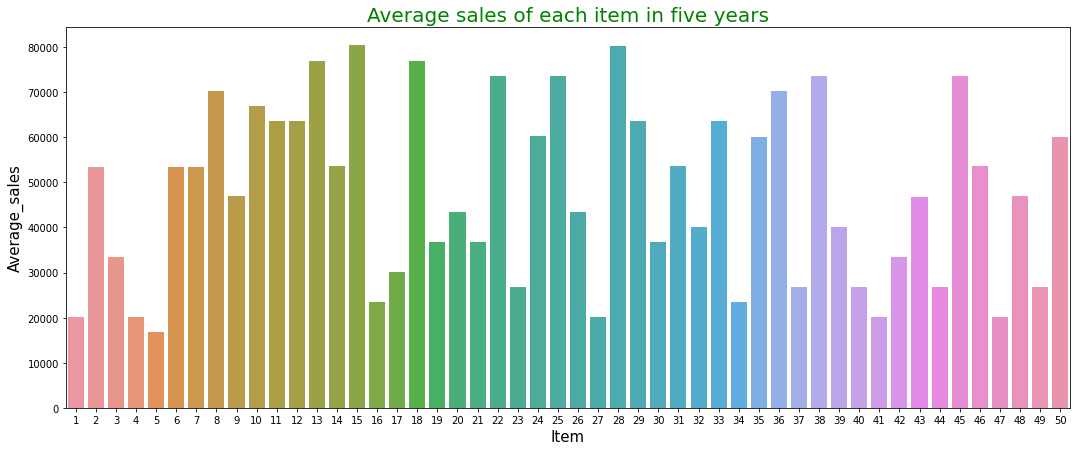

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(x='item',y='Average_sales',data=avg_df)
plt.xlabel("Item",size=15)
plt.ylabel("Average_sales",size=15)
plt.title("Average sales of each item in five years",color='g',size = 20)

In [ ]:
year_sales = df.groupby(['Year'])['sales'].sum()
year_sales = year_sales.to_frame(name="Total_sales").reset_index()
year_sales

,Year,Total_sales
0,2013,7941243
1,2014,9135482
2,2015,9536887
3,2016,10357160
4,2017,10733740


Text(0.5, 1.0, 'Total sales per each year')

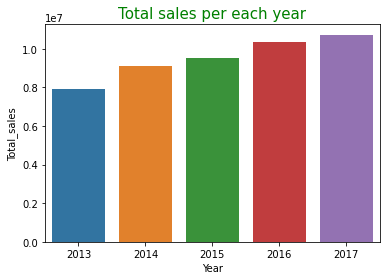

In [ ]:
sns.barplot(x='Year',y='Total_sales',data=year_sales)
plt.title("Total sales per each year",color='g',size = 15)

Total sales increased from 2013 to 2017

In [ ]:
x = df.groupby(['item'])['sales'].sum()
x = x.to_frame(name='Total_sales').reset_index()
x.head()

,item,Total_sales
0,1,401384
1,2,1069564
2,3,669087
3,4,401907
4,5,335230


Text(0.5, 1.0, 'Total sales of top ten items in five years')

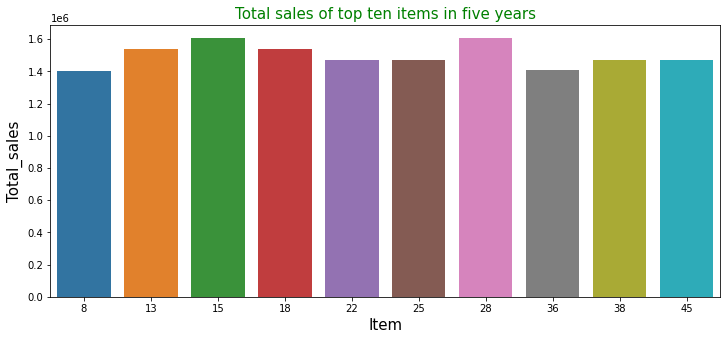

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='item',y='Total_sales',data=x.sort_values("Total_sales",ascending = False).head(10))
plt.xlabel("Item",size=15)
plt.ylabel("Total_sales",size=15)
plt.title("Total sales of top ten items in five years",color='g',size = 15)

Top ten sold items from 2013-2017 are :28>15>13>18>22>45>25>38>8>36 

# 2013 analysis

In [ ]:
year_2013.head()

,Year,item,sales,Quarter
0,2013,1,12847,1
1,2013,2,34650,1
2,2013,3,21420,1
3,2013,4,12884,1
4,2013,5,10630,1


In [ ]:
year_2013.shape

(200, 4)

In [ ]:
year_2013_qtr = year_2013.groupby(['Quarter'])['sales'].sum()
year_2013_qtr = year_2013_qtr.to_frame(name='Total_sales').reset_index()
year_2013_qtr

,Quarter,Total_sales
0,1,1531703
1,2,2241113
2,3,2312590
3,4,1855837


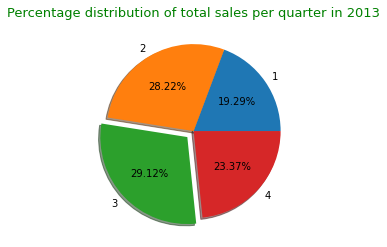

In [ ]:
plt.pie(year_2013_qtr['Total_sales'], labels = year_2013_qtr['Quarter'],explode= (0,0,0.1,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of total sales per quarter in 2013", color = 'g',fontsize=13)
plt.show()

The sales are high in quarter-3 in 2013 (Months 7,8,9).Q3>Q2>Q4>Q1

Text(0.5, 1.0, 'Total sales of top ten items in 2013 quarter-1')

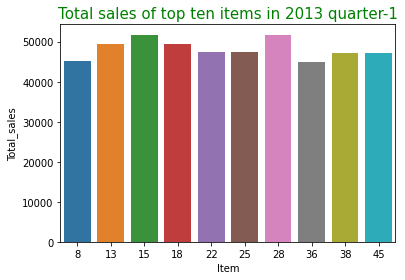

In [ ]:
xx = quart1_13.sort_values('sales',ascending=False)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.xlabel("Item")
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2013 quarter-1",color='g',size = 15)

Text(0.5, 1.0, 'Total sales of top ten items in 2013 quarter-2')

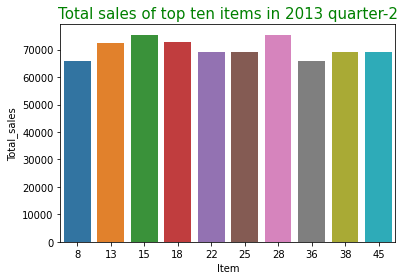

In [ ]:
xx = quart2_13.sort_values('sales',ascending=False)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.xlabel("Item")
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2013 quarter-2",color='g',size = 15)

Text(0.5, 1.0, 'Total sales of top ten items in 2013 quarter-3')

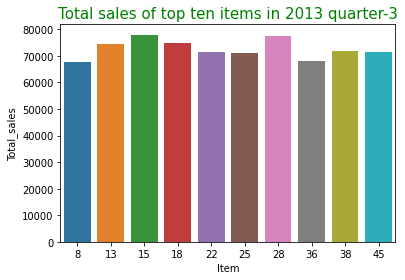

In [ ]:
xx = quart3_13.sort_values('sales',ascending=False)
sns.barplot(x='item',y = 'sales', data=xx.head(10))
plt.xlabel("Item")
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2013 quarter-3",color='g',size = 15)

Text(0.5, 1.0, 'Total sales of top ten items in 2013 quarter-4')

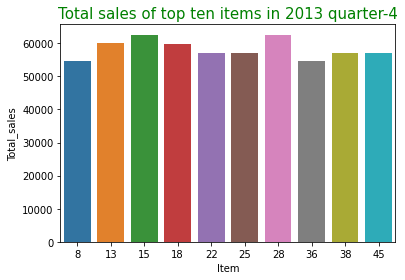

In [ ]:
xx = quart4_13.sort_values('sales',ascending=False)
sns.barplot(x='item',y = 'sales', data=xx.head(10))
plt.xlabel("Item")
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2013 quarter-4",color='g',size = 15)

For all 4 quarters in 2013, total sales of item no: 28>15>13>18>22>45>25>38>8>36

# 2014 Analysis

In [ ]:
year_2014_qtr = year_2014.groupby(['Quarter'])['sales'].sum()
year_2014_qtr = year_2014_qtr.to_frame(name='Total_sales').reset_index()
year_2014_qtr

,Quarter,Total_sales
0,1,1759405
1,2,2578633
2,3,2659730
3,4,2137714


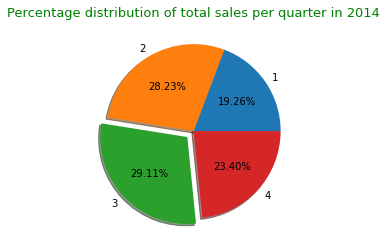

In [ ]:
plt.pie(year_2014_qtr['Total_sales'], labels = year_2014_qtr['Quarter'],explode= (0,0,0.1,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of total sales per quarter in 2014", color = 'g',fontsize=13)
plt.show()

The sales are high in quarter-3 in 2014(Months 7,8,9).Q3>Q2>Q4>Q1

Text(0.5, 1.0, 'Total sales of top ten items in 2014 quarter-4')

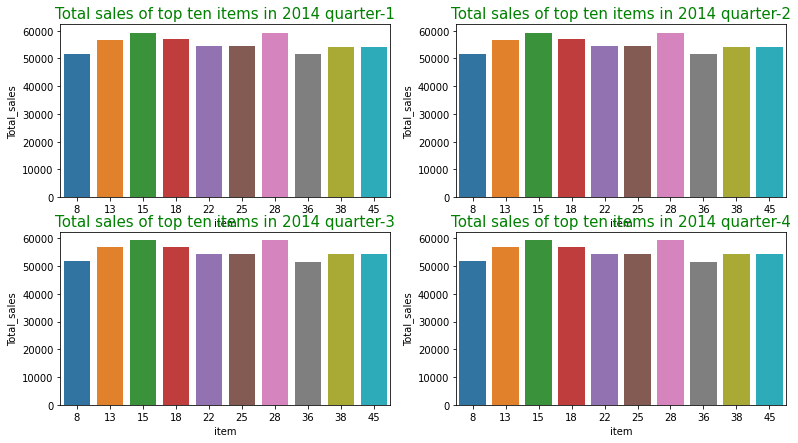

In [ ]:
plt.figure(figsize=(13,7))
xx = quart1_14.sort_values('sales',ascending=False)
plt.subplot(2,2,1)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2014 quarter-1",color='g',size = 15)
plt.subplot(2,2,2)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2014 quarter-2",color='g',size = 15)
plt.subplot(2,2,3)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2014 quarter-3",color='g',size = 15)
plt.subplot(2,2,4)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2014 quarter-4",color='g',size = 15)

For all 4 quarters in 2014, total sales of item no: 28>15>13>18>22>45>25>38>8>36

# 2015 Analysis

In [ ]:
year_2015_qtr = year_2015.groupby(['Quarter'])['sales'].sum()
year_2015_qtr = year_2015_qtr.to_frame(name='Total_sales').reset_index()
year_2015_qtr

,Quarter,Total_sales
0,1,1834781
1,2,2688553
2,3,2781083
3,4,2232470


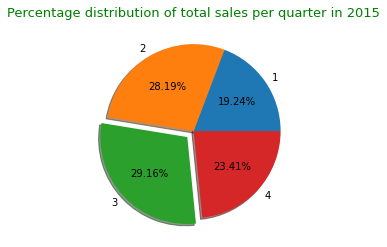

In [ ]:
plt.pie(year_2015_qtr['Total_sales'], labels = year_2015_qtr['Quarter'],explode= (0,0,0.1,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of total sales per quarter in 2015", color = 'g',fontsize=13)
plt.show()

The sales are high in quarter-3 in 2015 (Months 7,8,9).Q3>Q2>Q4>Q1


Text(0.5, 1.0, 'Total sales of top ten items in 2015 quarter-4')

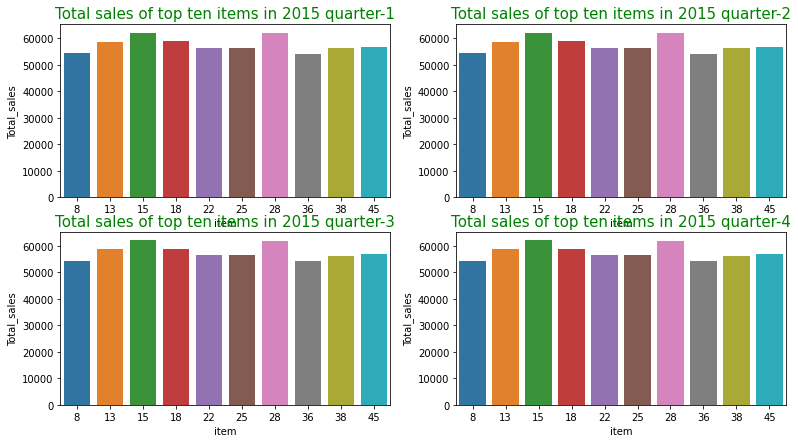

In [ ]:
plt.figure(figsize=(13,7))
xx = quart1_15.sort_values('sales',ascending=False)
plt.subplot(2,2,1)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2015 quarter-1",color='g',size = 15)
plt.subplot(2,2,2)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2015 quarter-2",color='g',size = 15)
plt.subplot(2,2,3)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2015 quarter-3",color='g',size = 15)
plt.subplot(2,2,4)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2015 quarter-4",color='g',size = 15)

For all 4 quarters in 2015, total sales of item no: 28>15>13>18>22>45>25>38>8>36

# 2016 Analysis

In [ ]:
year_2016_qtr = year_2016.groupby(['Quarter'])['sales'].sum()
year_2016_qtr = year_2016_qtr.to_frame(name='Total_sales').reset_index()
year_2016_qtr

,Quarter,Total_sales
0,1,2008277
1,2,2913344
2,3,3017043
3,4,2418496


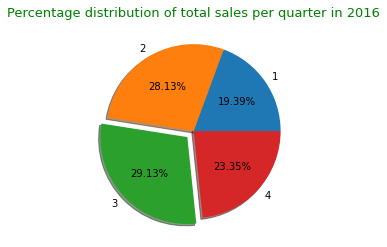

In [ ]:
plt.pie(year_2016_qtr['Total_sales'], labels = year_2016_qtr['Quarter'],explode= (0,0,0.1,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of total sales per quarter in 2016", color = 'g',fontsize=13)
plt.show()

The sales are high in quarter-3 in 2016 (Months 7,8,9).Q3>Q2>Q4>Q1

Text(0.5, 1.0, 'Total sales of top ten items in 2016 quarter-4')

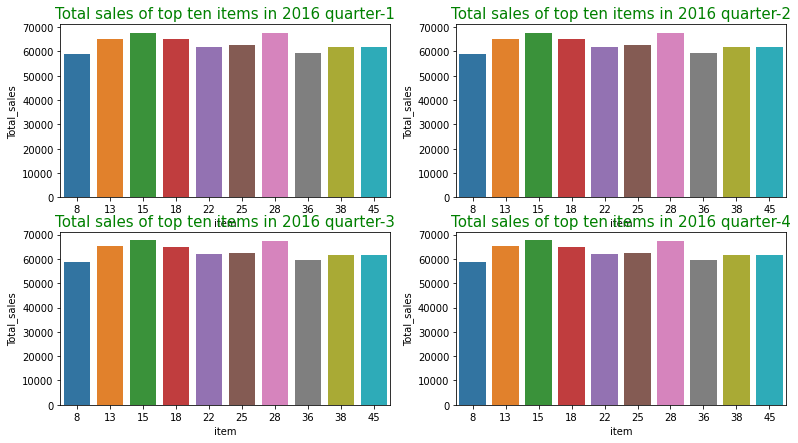

In [ ]:
plt.figure(figsize=(13,7))
xx = quart1_16.sort_values('sales',ascending=False)
plt.subplot(2,2,1)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2016 quarter-1",color='g',size = 15)
plt.subplot(2,2,2)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2016 quarter-2",color='g',size = 15)
plt.subplot(2,2,3)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2016 quarter-3",color='g',size = 15)
plt.subplot(2,2,4)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2016 quarter-4",color='g',size = 15)

For all 4 quarters in 2016, total sales of item no: 28>15>13>18>22>45>25>38>8>36

# 2017 Analysis

In [ ]:
year_2017_qtr = year_2017.groupby(['Quarter'])['sales'].sum()
year_2017_qtr = year_2017_qtr.to_frame(name='Total_sales').reset_index()
year_2017_qtr

,Quarter,Total_sales
0,1,2061342
1,2,3024172
2,3,3133059
3,4,2515167


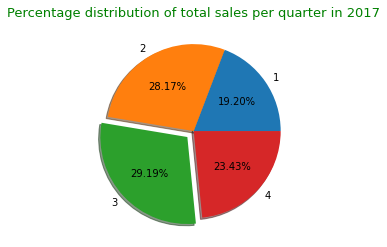

In [ ]:
plt.pie(year_2017_qtr['Total_sales'], labels = year_2017_qtr['Quarter'],explode= (0,0,0.1,0), autopct='%1.2f%%',shadow=True)
plt.title("Percentage distribution of total sales per quarter in 2017", color = 'g',fontsize=13)
plt.show()

The sales are high in quarter-3 in 2017 (Months 7,8,9).Q3>Q2>Q4>Q1

Text(0.5, 1.0, 'Total sales of top ten items in 2017 quarter-4')

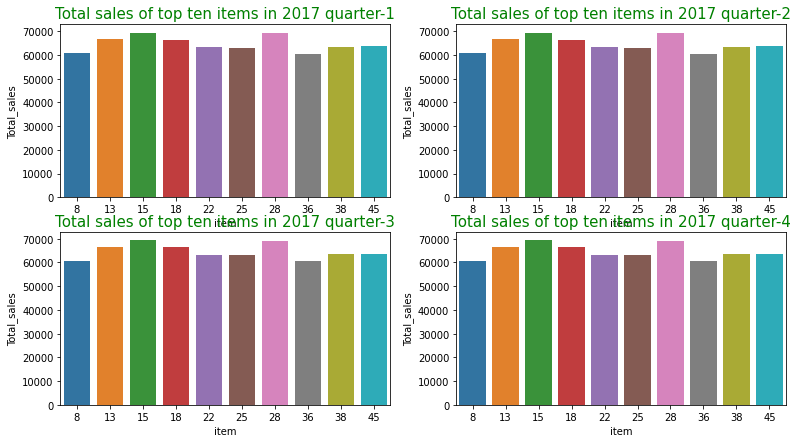

In [ ]:
plt.figure(figsize=(13,7))
xx = quart1_17.sort_values('sales',ascending=False)
plt.subplot(2,2,1)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2017 quarter-1",color='g',size = 15)
plt.subplot(2,2,2)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2017 quarter-2",color='g',size = 15)
plt.subplot(2,2,3)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2017 quarter-3",color='g',size = 15)
plt.subplot(2,2,4)
sns.barplot(x='item',y='sales', data=xx.head(10))
plt.ylabel("Total_sales")
plt.title("Total sales of top ten items in 2017 quarter-4",color='g',size = 15)

For all 4 quarters in 2017, total sales of item no: 28>15>13>18>22>45>25>38>8>36

**From the above observations, it is clear that the sales are high in quarter-3 (Q3>Q2>Q4>Q1) and the top 10 sold items are  28>15>13>18>22>45>25>38>8>36 for all the five years from 2013-2017.**